### STA 761 Research Project

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.graph_objs as go

### Data Overview

In [2]:
#Read in the data
Bank_Data = pd.read_excel('C:\\Users\\deemp\\OneDrive\\Attachments\\STA 761\\Bank_Data.xlsx')

#Bank_Data = pd.read_excel('STA761_ResearchProject2024_Bank_Data.xlsx')

#How the data looks
Bank_Data.head

<bound method NDFrame.head of        customer_number  customer_age occupation marital_status  \
0                    1            20     admin.         single   
1                    2            20     admin.         single   
2                    3            21     admin.         single   
3                    4            21     admin.         single   
4                    5            21     admin.         single   
...                ...           ...        ...            ...   
45215            45210            78    unknown        married   
45216            45211            82    unknown       divorced   
45217            45212             0     admin.         single   
45218            45213           150    retired         single   
45219            45214            25     admin.         single   

       education_level loan_default  account_balance  account_overdraft_limit  \
0      secondaryschool           no               66                        0   
1      secondar

In [3]:
#Check data types
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45220 entries, 0 to 45219
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45220 non-null  int64  
 1   customer_age                     45220 non-null  int64  
 2   occupation                       45220 non-null  object 
 3   marital_status                   45220 non-null  object 
 4   education_level                  45220 non-null  object 
 5   loan_default                     45220 non-null  object 
 6   account_balance                  45220 non-null  int64  
 7   account_overdraft_limit          45220 non-null  int64  
 8   home_ownership                   45220 non-null  object 
 9   personal_loan                    45220 non-null  object 
 10  contact_type                     45220 non-null  object 
 11  contact_day                      45220 non-null  int64  
 12  contact_month     

### Data Cleaning 

In [4]:
#Check the number of missing values
print("Missing reords",Bank_Data.isnull().sum())


Missing reords customer_number                    0
customer_age                       0
occupation                         0
marital_status                     0
education_level                    0
loan_default                       0
account_balance                    0
account_overdraft_limit            0
home_ownership                     0
personal_loan                      0
contact_type                       0
contact_day                        0
contact_month                      0
contact_time_s                     0
contact_time_m                     0
contact_count_campaign             0
days_past_previous_campaign        0
contact_count_previous_campaign    0
take_up_previous_campaign          0
deposit_take_up                    0
dtype: int64


In [5]:
#Check for duplicated entries
num_duplicates = Bank_Data.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 6


In [6]:
#Remove duplicated entries
Bank_Data_2 = Bank_Data.drop_duplicates()

#Validate the removal of duplicates
num_duplicates = Bank_Data_2.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 0


In [7]:
Bank_Data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45219
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45214 non-null  int64  
 1   customer_age                     45214 non-null  int64  
 2   occupation                       45214 non-null  object 
 3   marital_status                   45214 non-null  object 
 4   education_level                  45214 non-null  object 
 5   loan_default                     45214 non-null  object 
 6   account_balance                  45214 non-null  int64  
 7   account_overdraft_limit          45214 non-null  int64  
 8   home_ownership                   45214 non-null  object 
 9   personal_loan                    45214 non-null  object 
 10  contact_type                     45214 non-null  object 
 11  contact_day                      45214 non-null  int64  
 12  contact_month     

In [8]:
#Handling Unrealistic Customer Age Range
# Define realistic age range (18 to 100)
min_age = 18
max_age = 100

# Filter out rows with unrealistic customer_age values
Bank_Data_3 = Bank_Data_2[(Bank_Data_2['customer_age'] >= min_age) & (Bank_Data_2['customer_age'] <= max_age)]

#Visualize the data
Bank_Data_3

,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_type,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,take_up_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,unknown,19,jun,75,1.250000,2,-1,0,unknown,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,cellular,5,jun,133,2.216667,1,-1,0,unknown,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,unknown,16,may,467,7.783333,1,-1,0,unknown,no
3,4,21,admin.,single,unknown,no,-28,100,yes,no,unknown,27,may,125,2.083333,1,-1,0,unknown,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,cellular,26,mar,131,2.183333,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,45208,77,unknown,married,unknown,no,397,0,no,no,telephone,7,may,300,5.000000,3,-1,0,unknown,yes
45214,45209,77,unknown,married,unknown,no,397,0,no,no,telephone,8,nov,207,3.450000,1,185,3,yes,no
45215,45210,78,unknown,married,unknown,no,2235,0,no,no,telephone,14,apr,300,5.000000,3,-1,0,unknown,yes
45216,45211,82,unknown,divorced,unknown,no,0,0,no,no,telephone,9,sep,277,4.616667,5,-1,0,unknown,no


In [9]:
# Filter out the rows where 'deposit_take_up' is 'unknown'
Bank_Data_3 = Bank_Data_3[Bank_Data_3['deposit_take_up'] != "unknown"]


In [10]:
#Correcting the months to be written in the same way
# Replace 'june' with 'jun'
Bank_Data_3['contact_month'] = Bank_Data_3['contact_month'].replace('june', 'jun')

#Output
Bank_Data_3

C:\Users\deemp\AppData\Local\Temp\ipykernel_12888\227188231.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_type,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,take_up_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,unknown,19,jun,75,1.250000,2,-1,0,unknown,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,cellular,5,jun,133,2.216667,1,-1,0,unknown,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,unknown,16,may,467,7.783333,1,-1,0,unknown,no
3,4,21,admin.,single,unknown,no,-28,100,yes,no,unknown,27,may,125,2.083333,1,-1,0,unknown,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,cellular,26,mar,131,2.183333,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45212,45207,75,unknown,married,highereducation,no,643,0,no,no,cellular,15,oct,522,8.700000,2,-1,0,unknown,no
45213,45208,77,unknown,married,unknown,no,397,0,no,no,telephone,7,may,300,5.000000,3,-1,0,unknown,yes
45214,45209,77,unknown,married,unknown,no,397,0,no,no,telephone,8,nov,207,3.450000,1,185,3,yes,no
45215,45210,78,unknown,married,unknown,no,2235,0,no,no,telephone,14,apr,300,5.000000,3,-1,0,unknown,yes


### Descriptive Analysis

##### Summary Statistics

In [11]:
# Compute descriptive statistics
Summary_stats = Bank_Data_3.describe()

Summary_stats

,customer_number,customer_age,account_balance,account_overdraft_limit,contact_day,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,67.061113,15.806419,258.163080,4.302718,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,267.446634,8.322476,257.527812,4.292130,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,0.000000,8.000000,103.000000,1.716667,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,0.000000,16.000000,180.000000,3.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,0.000000,21.000000,319.000000,5.316667,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,10000.000000,31.000000,4918.000000,81.966667,63.000000,871.000000,275.000000


In [12]:
#Set the negative values of 'days past previous campaign' to zero
Bank_Data_3['days_past_previous_campaign'] = Bank_Data_3['days_past_previous_campaign'].apply(lambda x: max(x, 0))

#Visualize the data
Bank_Data_3

C:\Users\deemp\AppData\Local\Temp\ipykernel_12888\3372298820.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_number,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_type,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,take_up_previous_campaign,deposit_take_up
0,1,20,admin.,single,secondaryschool,no,66,0,yes,no,unknown,19,jun,75,1.250000,2,0,0,unknown,no
1,2,20,admin.,single,secondaryschool,no,336,0,no,yes,cellular,5,jun,133,2.216667,1,0,0,unknown,no
2,3,21,admin.,single,secondaryschool,no,325,0,yes,no,unknown,16,may,467,7.783333,1,0,0,unknown,no
3,4,21,admin.,single,unknown,no,-28,100,yes,no,unknown,27,may,125,2.083333,1,0,0,unknown,no
4,5,21,admin.,single,highereducation,no,242,0,no,yes,cellular,26,mar,131,2.183333,4,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45212,45207,75,unknown,married,highereducation,no,643,0,no,no,cellular,15,oct,522,8.700000,2,0,0,unknown,no
45213,45208,77,unknown,married,unknown,no,397,0,no,no,telephone,7,may,300,5.000000,3,0,0,unknown,yes
45214,45209,77,unknown,married,unknown,no,397,0,no,no,telephone,8,nov,207,3.450000,1,185,3,yes,no
45215,45210,78,unknown,married,unknown,no,2235,0,no,no,telephone,14,apr,300,5.000000,3,0,0,unknown,yes


In [13]:
Bank_Data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45216
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_number                  45211 non-null  int64  
 1   customer_age                     45211 non-null  int64  
 2   occupation                       45211 non-null  object 
 3   marital_status                   45211 non-null  object 
 4   education_level                  45211 non-null  object 
 5   loan_default                     45211 non-null  object 
 6   account_balance                  45211 non-null  int64  
 7   account_overdraft_limit          45211 non-null  int64  
 8   home_ownership                   45211 non-null  object 
 9   personal_loan                    45211 non-null  object 
 10  contact_type                     45211 non-null  object 
 11  contact_day                      45211 non-null  int64  
 12  contact_month     

In [14]:
#Drop customer number

Bank_Data_5 = Bank_Data_3.drop(columns=['customer_number'])

Bank_Data_5.head()

,customer_age,occupation,marital_status,education_level,loan_default,account_balance,account_overdraft_limit,home_ownership,personal_loan,contact_type,contact_day,contact_month,contact_time_s,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,take_up_previous_campaign,deposit_take_up
0,20,admin.,single,secondaryschool,no,66,0,yes,no,unknown,19,jun,75,1.250000,2,0,0,unknown,no
1,20,admin.,single,secondaryschool,no,336,0,no,yes,cellular,5,jun,133,2.216667,1,0,0,unknown,no
2,21,admin.,single,secondaryschool,no,325,0,yes,no,unknown,16,may,467,7.783333,1,0,0,unknown,no
3,21,admin.,single,unknown,no,-28,100,yes,no,unknown,27,may,125,2.083333,1,0,0,unknown,no
4,21,admin.,single,highereducation,no,242,0,no,yes,cellular,26,mar,131,2.183333,4,0,0,unknown,no


#### Exploratory Data Analysis

In [15]:
def grab_column_names(dataframe, categorical_threshold=10, cardinality_threshold=20):


    # Extracting categorical columns
    categorical_columns = [column for column in dataframe.columns if dataframe[column].dtype == "O"]

    # Extracting numerical columns that behave like categorical
    numerical_but_categorical = [column for column in dataframe.columns if dataframe[column].nunique() < categorical_threshold
                                 and dataframe[column].dtype != "O"]

    # Extracting numerical columns
    numerical_columns = [column for column in dataframe.columns if dataframe[column].dtype != "O"]
    numerical_columns = [column for column in numerical_columns if column not in numerical_but_categorical]

    # Printing summary information
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(categorical_columns)}')
    print(f'Numerical Columns: {len(numerical_columns)}')
    print(f'Numerical but Categorical Columns: {len(numerical_but_categorical)}')

    return categorical_columns,numerical_but_categorical, numerical_columns

# Usage:
categorical_columns,numerical_but_categorical,numerical_columns = grab_column_names(Bank_Data_5)

Observations: 45211
Variables: 19
Categorical Columns: 10
Numerical Columns: 8
Numerical but Categorical Columns: 1


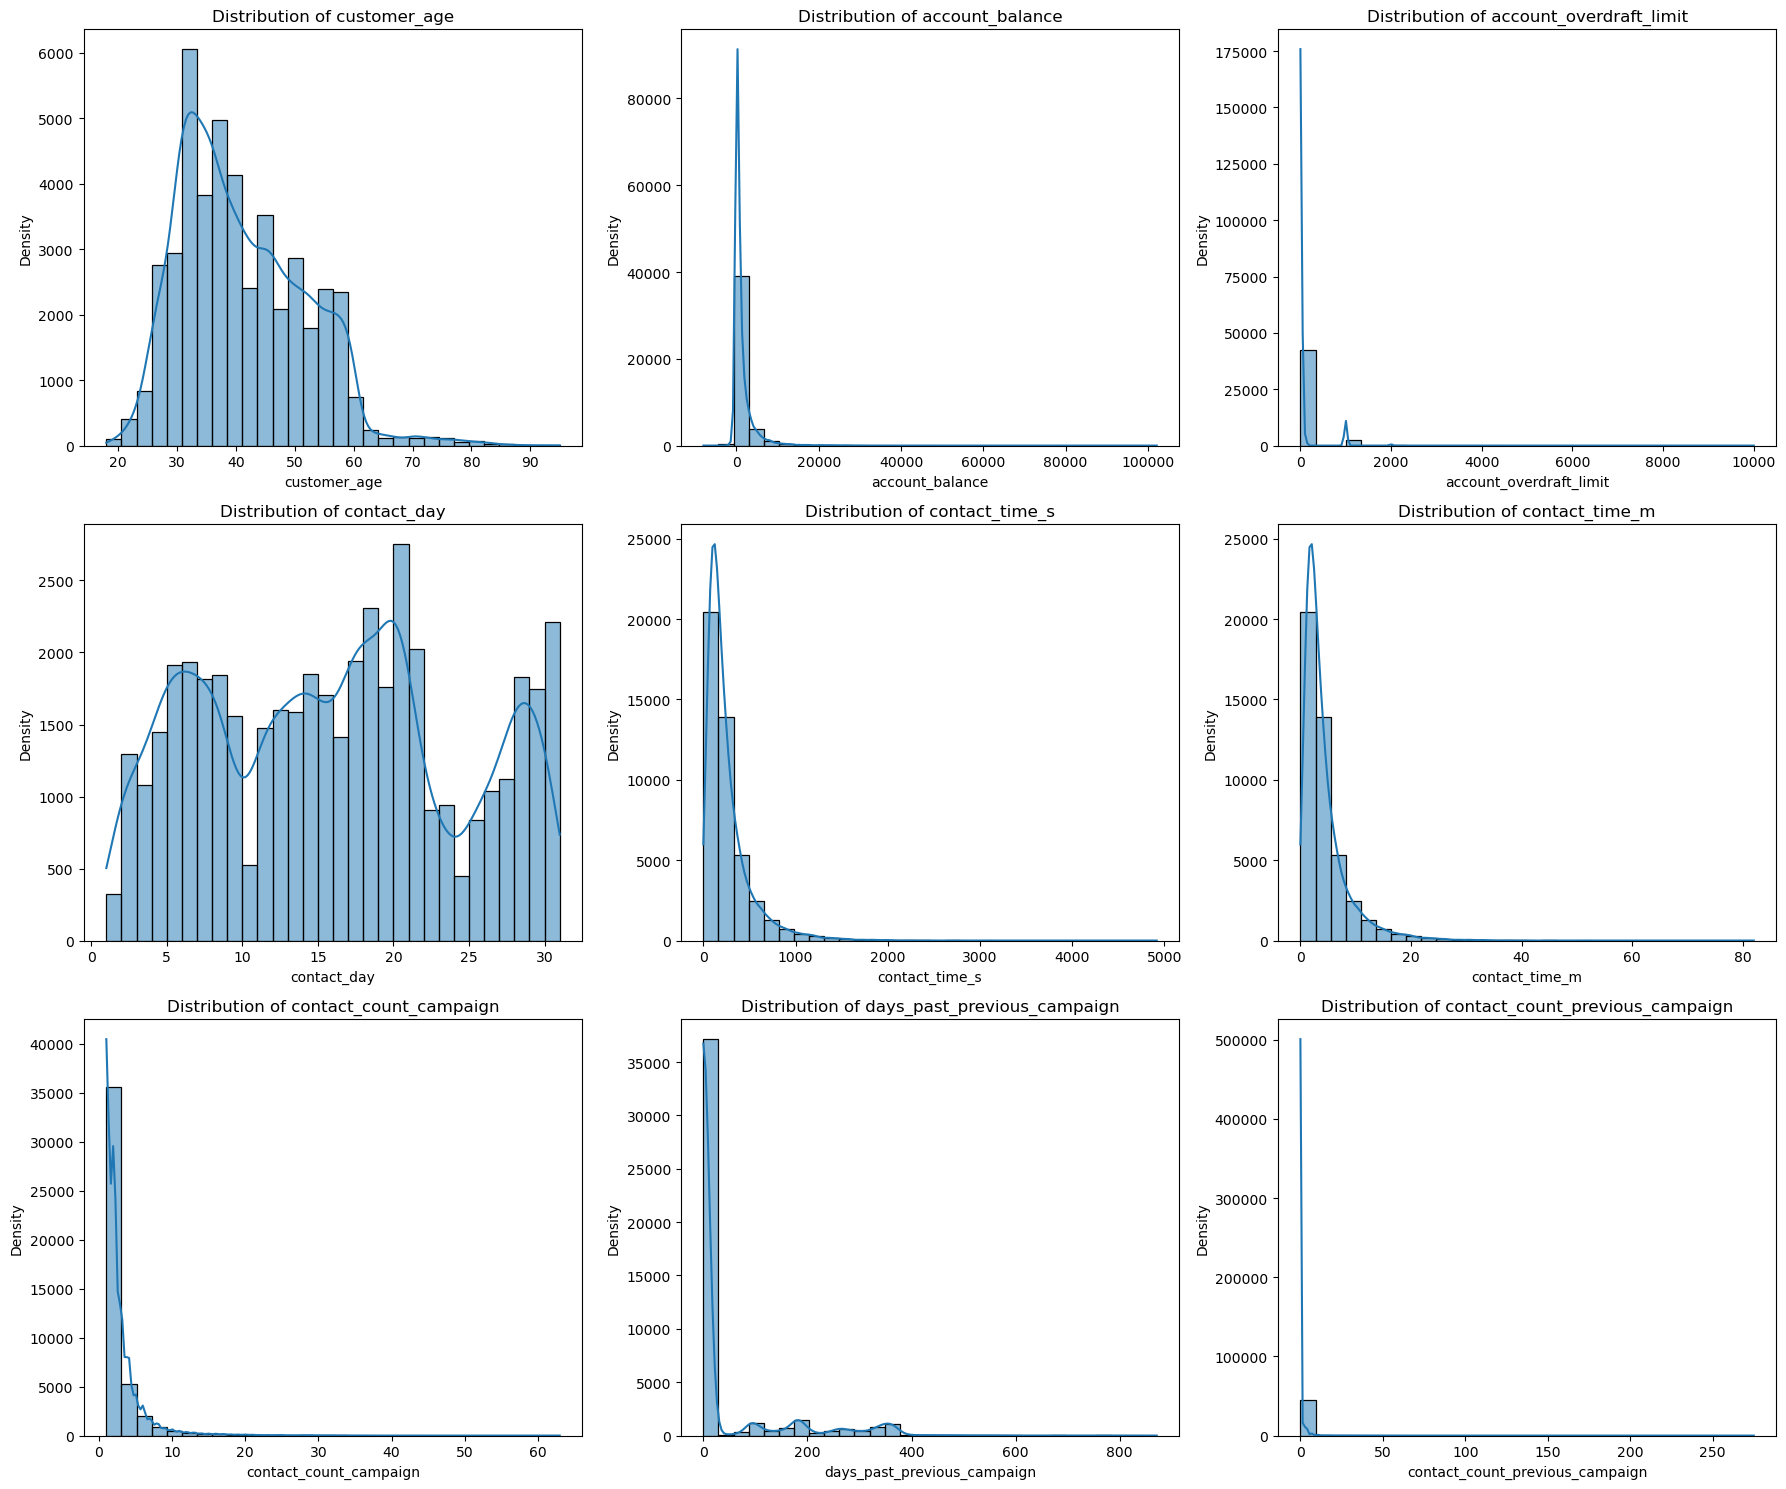

In [16]:
# Select numerical columns
numerical_columns = Bank_Data_5.select_dtypes(include=['float64', 'int64']).columns

# Set up the number of rows and columns for the plots
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

# Create the subplots
plt.figure(figsize=(18, num_rows * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(Bank_Data_5[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

distribution of customer_age:

The age distribution is right-skewed, with most customers falling between the ages of 20 to 60, peaking around 30-35. There are fewer customers above 60, which is common in many datasets where older age groups are underrepresented.
Distribution of account_balance:

This distribution is highly right-skewed, with a large number of customers having a lower account balance. A few customers have significantly higher balances, leading to a long tail on the right side.
Distribution of account_overdraft_limit:

The overdraft limit also shows a strong right-skew, with most customers having little to no overdraft limit. A small number of customers have a much higher limit.
Distribution of contact_day:

The contact days are somewhat uniformly distributed across the month, with slight peaks on certain days, possibly indicating specific days when customers are more likely to be contacted.
Distribution of contact_time_s:

The time spent on contact in seconds shows a sharp right-skew, with most contacts being brief and a few extending to longer durations.
Distribution of contact_time_m:

Similarly, when contact time is measured in minutes, the distribution remains right-skewed, with most contacts being very short and only a few extending beyond a few minutes.
Distribution of contact_count_campaign:

The number of contacts per campaign is right-skewed, with most customers being contacted only a few times, and very few contacted multiple times. This is typical in marketing campaigns where most contacts do not require repeated outreach.
Distribution of days_past_previous_campaign:

This variable shows a right-skewed distribution, with most customers having a short interval since the last campaign, and a few having a much longer gap.
Distribution of contact_count_previous_campaign:

This distribution is extremely right-skewed, with most customers having no or very few previous contacts. A very small number of customers have a high number of contacts from previous campaigns.
Overall Insights:
Right-skewness: Most variables exhibit right-skewness, indicating that the majority of data points are clustered at lower values with fewer high-value outliers. This is common in financial and marketing data.
Uniformity in Contact Days: The contact day variable shows some uniformity, which might suggest an equal distribution of marketing efforts across the month.

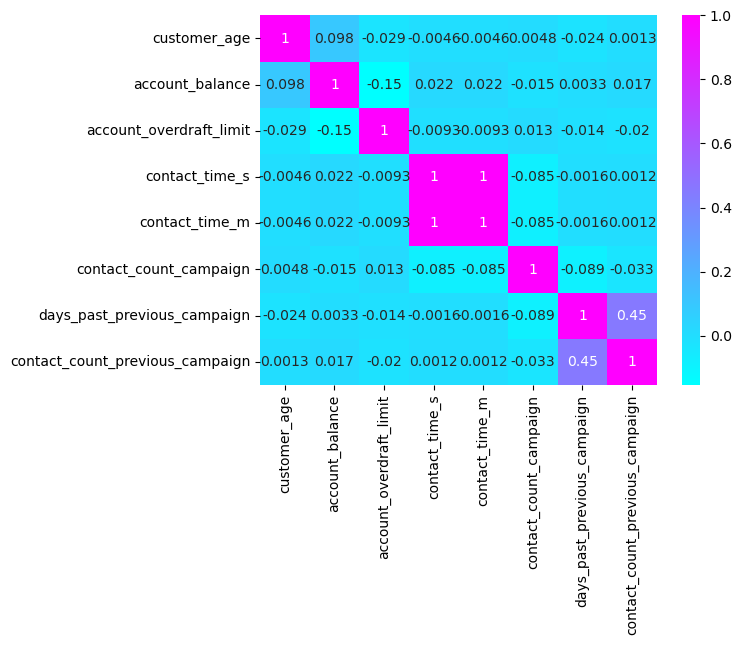

In [17]:
# Create list of numerical columns
numerical_columns = [
    'customer_age', 'account_balance', 'account_overdraft_limit', 
    'contact_time_s', 'contact_time_m', 'contact_count_campaign', 
    'days_past_previous_campaign', 'contact_count_previous_campaign']

# Correlation matrix
correlation_matrix = Bank_Data_5[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.show()

In [18]:
Bank_Data_5.drop(['contact_time_s' ], axis=1, inplace=True)

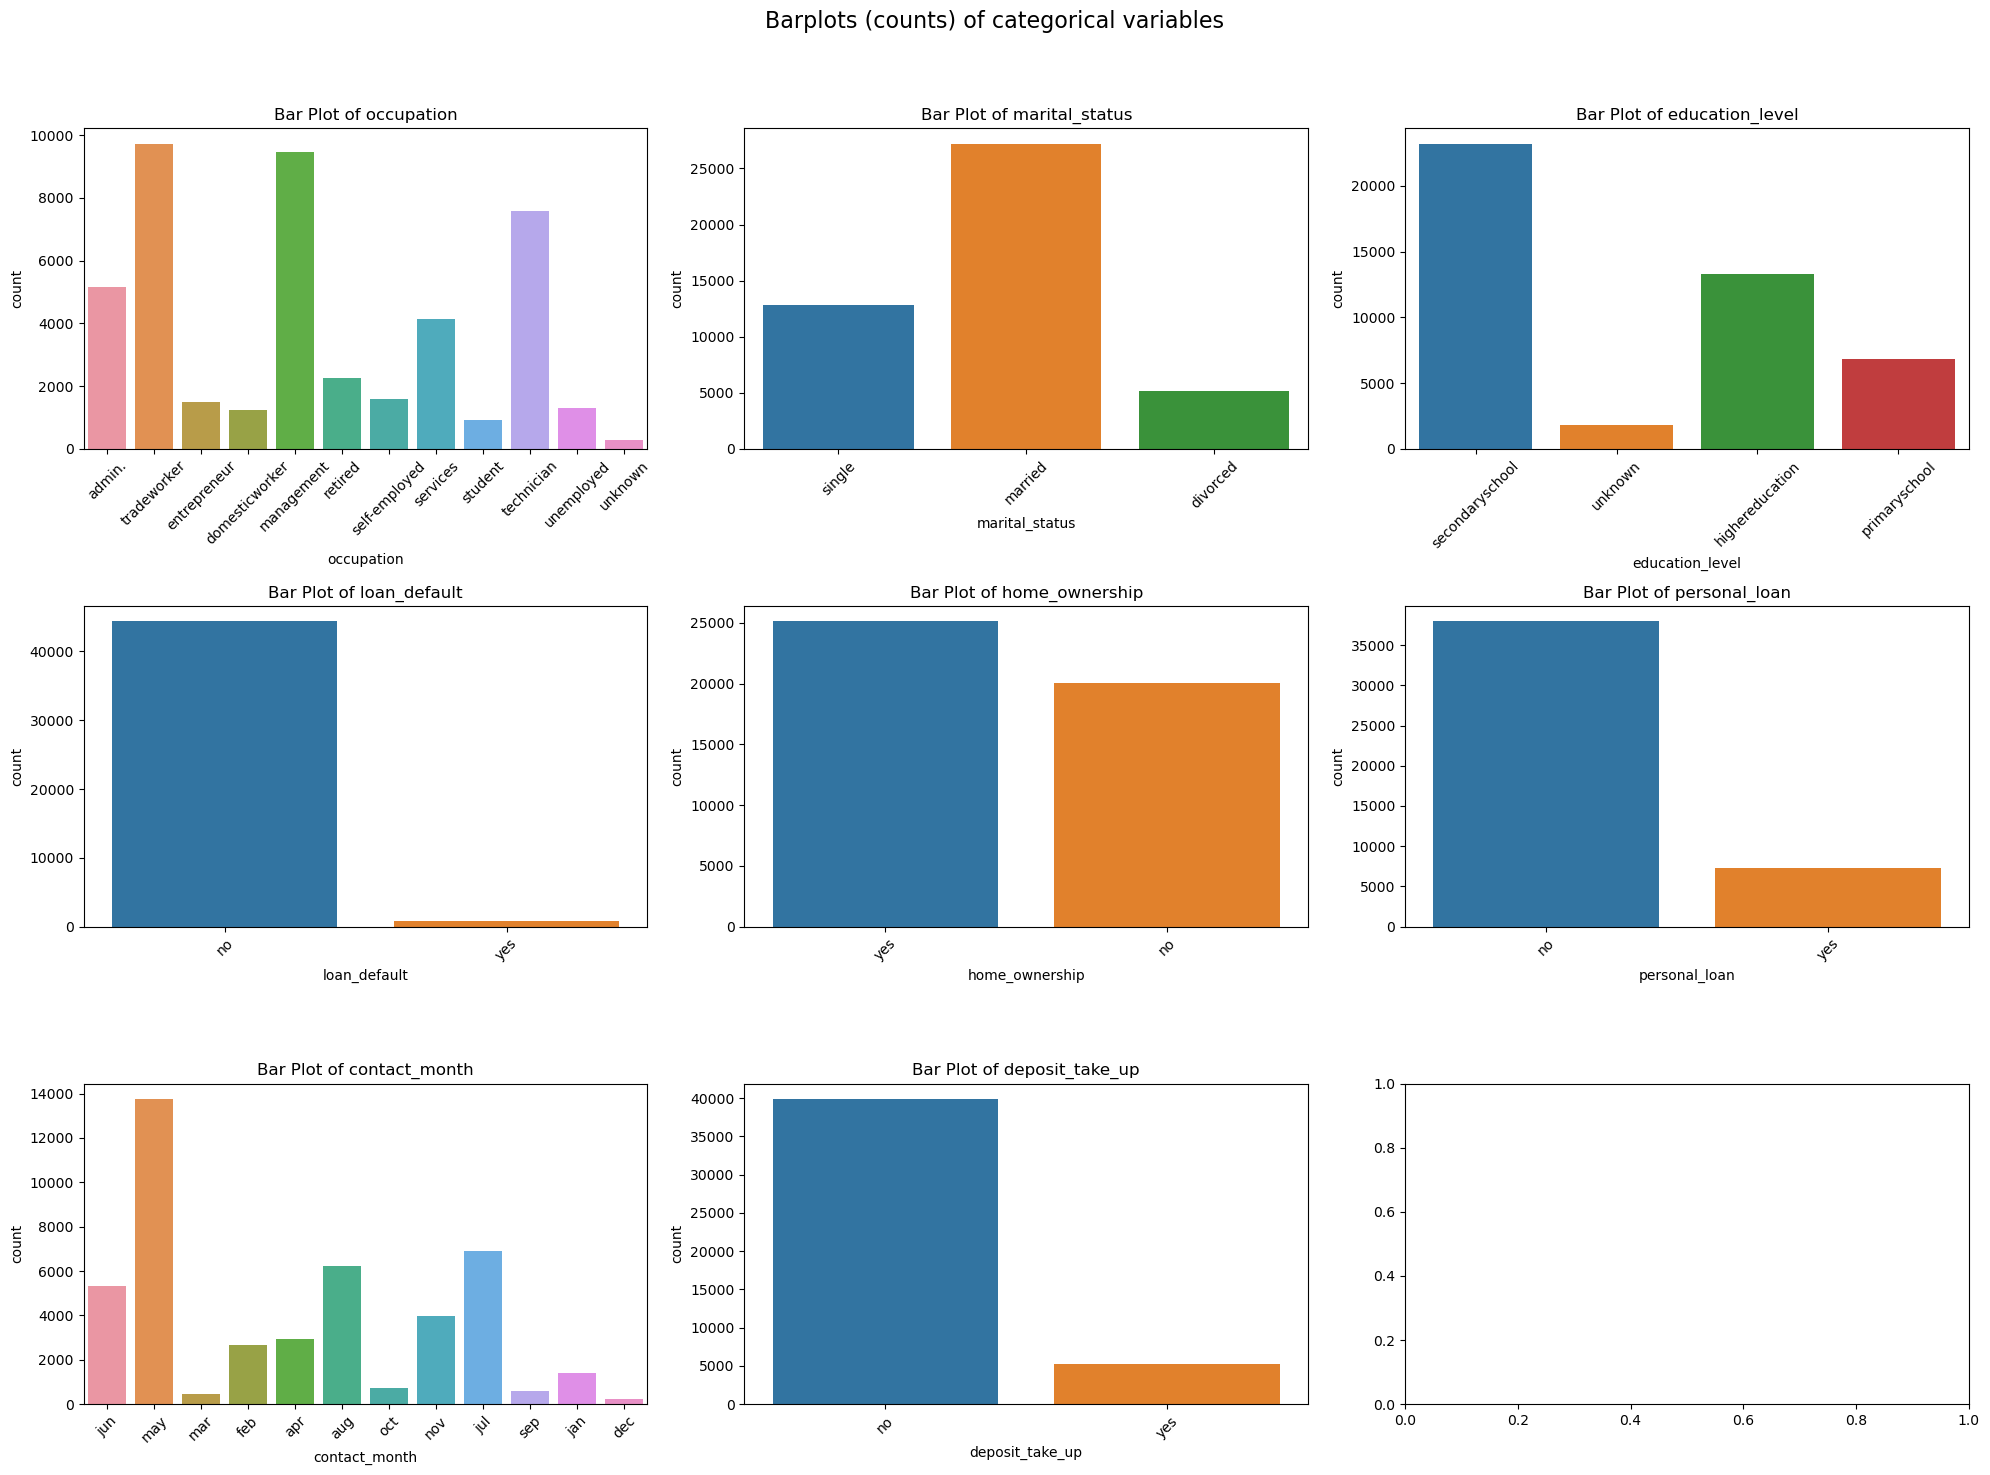

In [19]:
# Visualize categorical features
# Create list of categorical columns
categorical_columns = [
    'occupation', 'marital_status', 'education_level', 'loan_default', 
    'home_ownership', 'personal_loan', 'contact_month',  'deposit_take_up'
]

# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), squeeze=False)

# Add a title to the entire figure
fig.suptitle('Barplots (counts) of categorical variables', fontsize=16)

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    ax = axes[i // n_cols, i % n_cols]
    if column in Bank_Data_5.columns:
        sns.countplot(x=column, data=Bank_Data_5, ax=ax)
        ax.set_title(f'Bar Plot of {column}')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.text(0.5, 0.5, f"'{column}' not found", ha='center', va='center')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Output
plt.show()

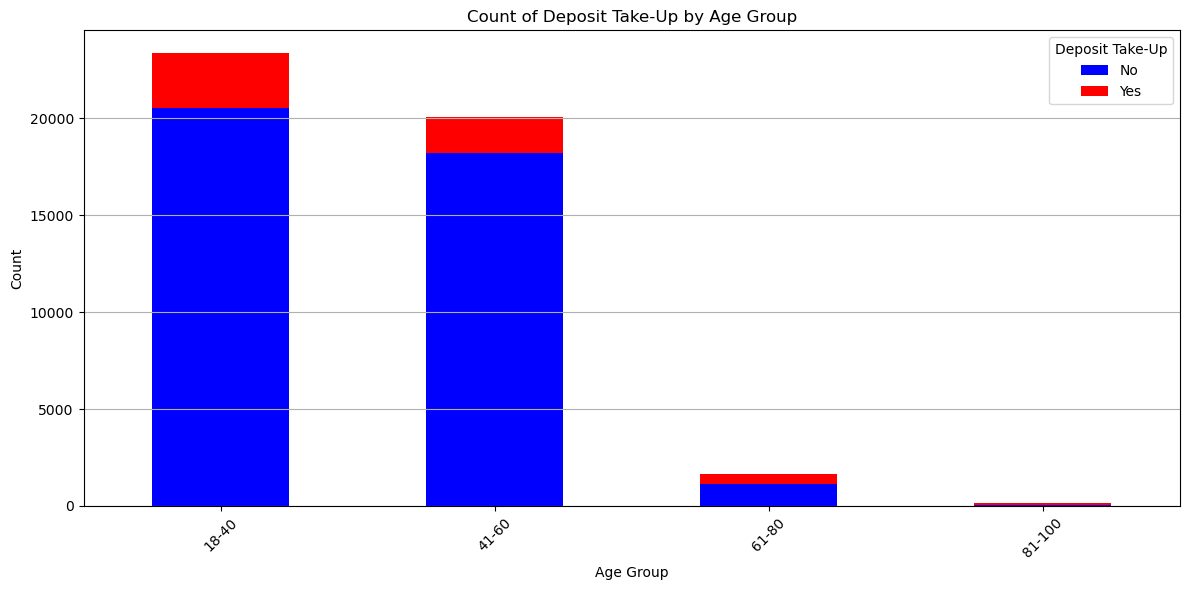

In [20]:
# Create bins for customer age
bins = [18, 40, 60, 80, 100]
bin_labels = ['18-40', '41-60', '61-80', '81-100']  # Corrected to be a list

# Bin the age data
Bank_Data_5['age_group'] = pd.cut(Bank_Data_5['customer_age'], bins=bins, labels=bin_labels, right=False)

# Count occurrences of deposit_take_up for each age group
count_age_deposit = pd.crosstab(Bank_Data_5['age_group'], Bank_Data_5['deposit_take_up'])

# Plot the data
count_age_deposit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])  # Fixed color argument

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Deposit Take-Up by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Deposit Take-Up', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()



In [21]:
Bank_Data_5['deposit_take_up'].unique()

array(['no', 'yes'], dtype=object)

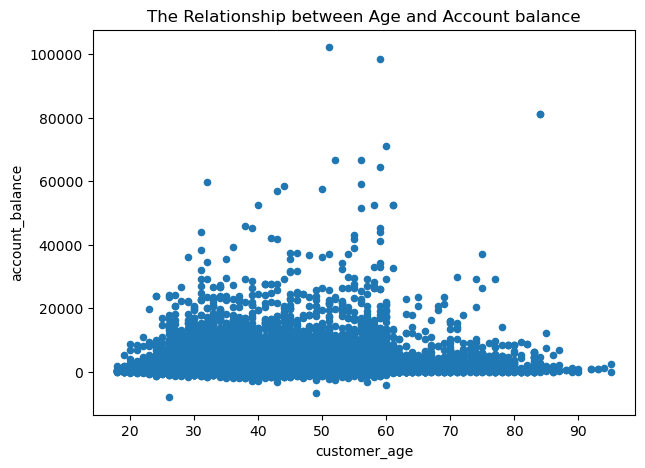

In [22]:
#Scatterplot of age vs account_balance
Scatter_age_contact_time = Bank_Data_5.plot.scatter('customer_age','account_balance',figsize = (7,5))

plt.title('The Relationship between Age and Account balance')
plt.show()

#### Encoding categorical variables

In [23]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45216
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   customer_age                     45211 non-null  int64   
 1   occupation                       45211 non-null  object  
 2   marital_status                   45211 non-null  object  
 3   education_level                  45211 non-null  object  
 4   loan_default                     45211 non-null  object  
 5   account_balance                  45211 non-null  int64   
 6   account_overdraft_limit          45211 non-null  int64   
 7   home_ownership                   45211 non-null  object  
 8   personal_loan                    45211 non-null  object  
 9   contact_type                     45211 non-null  object  
 10  contact_day                      45211 non-null  int64   
 11  contact_month                    45211 non-null  object  
 12  cont

In [24]:
# Encode categorical variables
categorical_columns = [
    'occupation','take_up_previous_campaign',
    'marital_status',
    'education_level',
    'loan_default',
    'home_ownership',
    'personal_loan','contact_type']

# Create dummy variables
Bank_Data_5= pd.get_dummies(Bank_Data_5, columns=categorical_columns, drop_first=True)

# For binary target use label encoding
Bank_Data_5['deposit_take_up'] = Bank_Data_5['deposit_take_up'].map({'no': 0, 'yes': 1})


In [25]:
#Encoding the months
from sklearn.preprocessing import OrdinalEncoder
#Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'contact_month' column(ordered )
Bank_Data_5['contact_month_encoded'] = encoder.fit_transform(Bank_Data_5[['contact_month']])

# Drop the 'contact_month' column
Bank_Data_5 = Bank_Data_5.drop(columns=['contact_month'])

In [26]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45216
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customer_age                       45211 non-null  int64   
 1   account_balance                    45211 non-null  int64   
 2   account_overdraft_limit            45211 non-null  int64   
 3   contact_day                        45211 non-null  int64   
 4   contact_time_m                     45211 non-null  float64 
 5   contact_count_campaign             45211 non-null  int64   
 6   days_past_previous_campaign        45211 non-null  int64   
 7   contact_count_previous_campaign    45211 non-null  int64   
 8   deposit_take_up                    45211 non-null  int64   
 9   age_group                          45211 non-null  category
 10  occupation_domesticworker          45211 non-null  uint8   
 11  occupation_entrepreneur            45211 

In [27]:
#Drop age group (categorical)
Bank_Data_5.drop(['age_group' ], axis=1, inplace=True)

In [28]:
Bank_Data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45216
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_age                       45211 non-null  int64  
 1   account_balance                    45211 non-null  int64  
 2   account_overdraft_limit            45211 non-null  int64  
 3   contact_day                        45211 non-null  int64  
 4   contact_time_m                     45211 non-null  float64
 5   contact_count_campaign             45211 non-null  int64  
 6   days_past_previous_campaign        45211 non-null  int64  
 7   contact_count_previous_campaign    45211 non-null  int64  
 8   deposit_take_up                    45211 non-null  int64  
 9   occupation_domesticworker          45211 non-null  uint8  
 10  occupation_entrepreneur            45211 non-null  uint8  
 11  occupation_management              45211 non-null  uin

In [29]:
Bank_Data_5


,customer_age,account_balance,account_overdraft_limit,contact_day,contact_time_m,contact_count_campaign,days_past_previous_campaign,contact_count_previous_campaign,deposit_take_up,occupation_domesticworker,...,marital_status_single,education_level_primaryschool,education_level_secondaryschool,education_level_unknown,loan_default_yes,home_ownership_yes,personal_loan_yes,contact_type_telephone,contact_type_unknown,contact_month_encoded
0,20,66,0,19,1.250000,2,0,0,0,0,...,1,0,1,0,0,1,0,0,1,6.0
1,20,336,0,5,2.216667,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,6.0
2,21,325,0,16,7.783333,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,8.0
3,21,-28,100,27,2.083333,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,8.0
4,21,242,0,26,2.183333,4,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45212,75,643,0,15,8.700000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0
45213,77,397,0,7,5.000000,3,0,0,1,0,...,0,0,0,1,0,0,0,1,0,8.0
45214,77,397,0,8,3.450000,1,185,3,0,0,...,0,0,0,1,0,0,0,1,0,9.0
45215,78,2235,0,14,5.000000,3,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0.0


### Model Development

#### Splitting Data into Train and Test

In [30]:
from sklearn.model_selection import train_test_split
# Define the target variable and predictor variables
X = Bank_Data_5.drop(['deposit_take_up'], axis=1)
y = Bank_Data_5['deposit_take_up']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(Bank_Data_5.drop('deposit_take_up',axis=1), 
                                                    Bank_Data_5['deposit_take_up'], test_size=0.30, 
                                                    random_state=101)

#### Model 1: Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
M = logmodel.fit(X_train,y_train)

C:\Users\deemp\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [34]:
predictions = logmodel.predict(X_test)

In [35]:
import statsmodels.api as sm

glm = sm.GLM(y_train,
X_train,
family=sm.families.Binomial())
results = glm.fit()

In [36]:
results

In [37]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        deposit_take_up   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31614
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8010.0
Date:                Sun, 01 Sep 2024   Deviance:                       16020.
Time:                        20:39:59   Pearson chi2:                 1.24e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1965
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
custom

In [38]:
significant_vars = results.pvalues[results.pvalues < 0.05].index.tolist()
print("Significant variables at alpha = 0.05:")
print(significant_vars)

Significant variables at alpha = 0.05:
['customer_age', 'account_balance', 'account_overdraft_limit', 'contact_day', 'contact_time_m', 'contact_count_campaign', 'days_past_previous_campaign', 'occupation_domesticworker', 'occupation_entrepreneur', 'occupation_management', 'occupation_retired', 'occupation_self-employed', 'occupation_services', 'occupation_technician', 'occupation_tradeworker', 'occupation_unemployed', 'occupation_unknown', 'take_up_previous_campaign_unknown', 'take_up_previous_campaign_yes', 'marital_status_married', 'marital_status_single', 'education_level_primaryschool', 'education_level_secondaryschool', 'home_ownership_yes', 'personal_loan_yes', 'contact_type_unknown', 'contact_month_encoded']


##### Logistic Regression  Validation and Evaluation

In [39]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12003
           1       0.54      0.22      0.31      1561

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



In [41]:
print("The accuracy of the model is: ", metrics.accuracy_score(predictions,y_test)*100, "%")

The accuracy of the model is:  88.83810085520494 %


In [42]:
from sklearn.model_selection import KFold
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Variable to store the best model and its mean cross-validation score
best_cv_score = 0
best_model = None

# Perform cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the model on the training fold
    glm = sm.GLM(y_train_fold, X_train_fold, family=sm.families.Binomial())
    results = glm.fit()
    
    # Predict on the validation fold
    y_pred_prob = results.predict(X_test_fold)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate the accuracy on the validation fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred)
    
    # Check if this is the best model so far
    if fold_accuracy > best_cv_score:
        best_cv_score = fold_accuracy
        best_model = results

# Now best_model contains the best cross-validated model
print(f"Best Cross-Validated Model's Accuracy on Validation Folds: {best_cv_score}")



Best Cross-Validated Model's Accuracy on Validation Folds: 0.9022116903633491


In [43]:
#Cross validation for better model fit
# Predict on the training data
y_train_pred_prob = best_model.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Predict on the test data
y_test_pred_prob = best_model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.8992637532783518
Test Accuracy: 0.9016514302565615


In [44]:
#Evaluation using ROC indexfrom sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score
# Get the probability scores for the positive class from the best logistic regression model
y_prob_glm = best_model.predict(X_test)

# Calculate the ROC AUC score
roc_auc_glm = roc_auc_score(y_test, y_prob_glm)
print(f'ROC AUC Score (GLM): {roc_auc_glm:.2f}')

ROC AUC Score (GLM): 0.88


In [45]:
# Refit the best model on the entire training dataset
best_glm_final = sm.GLM(y_train, X_train, family=sm.families.Binomial())
best_results_final = best_glm_final.fit()

# Print the summary of the best model
print(best_results_final.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        deposit_take_up   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31614
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8010.0
Date:                Sun, 01 Sep 2024   Deviance:                       16020.
Time:                        20:40:02   Pearson chi2:                 1.24e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1965
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
custom

In [46]:
#Output the table as a picture

# Assuming summary_table is your DataFrame
summary_table = summary_table.round(3)  # Round numerical values to three decimal places

# Convert p-values to float before formatting
summary_table['P>|z|'] = summary_table['P>|z|'].astype(float).apply(lambda x: f"{x:.3g}") 

# Include the variable names as the first column if not already done
summary_table['Variable'] = summary_table.index

# Reorder columns to place 'Variable' at the beginning
summary_table = summary_table[['Variable'] + [col for col in summary_table.columns if col != 'Variable']]

# Create a plot with title
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=summary_table.values, colLabels=summary_table.columns, cellLoc='center', loc='center')

# Adjust font size and weight for better visibility
table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size to ensure text fits within the cells
table.scale(1.4, 1.4)  # Scale the table for better visibility

# Make the text in the table more readable by adjusting cell height and width
for key, cell in table.get_celld().items():
    cell.set_fontsize(8)  # Adjust cell font size
    cell.set_text_props(ha='center', va='center')  # Align text in the center

# Add a title to the plot
plt.title('Logistic regression: Variable selection', fontsize=16, pad=20)

# Save the table as an image
plt.savefig("glm_summary_adjusted.png", dpi=300, bbox_inches='tight')  # Save as PNG with better formatting
plt.show()  # Display the table

NameError: name 'summary_table' is not defined

#### Model 2:Decision tree

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
#Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

##### Decision Tree Validation and Evaluation

In [ ]:
# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


In [ ]:
#Reduce overfitting with k-fold cross-validation
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Use cross-validation to evaluate the initial model
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Initial CV scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Set up a parameter grid to tune hyperparameters for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model after grid search
best_clf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model using cross-validation
best_cv_scores = cross_val_score(best_clf, X, y, cv=5)
print(f"Best model CV scores: {best_cv_scores}")
print(f"Mean best model CV score: {best_cv_scores.mean()}")

# Fit the best model on the entire dataset (optional, depending on the use case)
best_clf.fit(X, y)


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the training data
y_train_pred = best_clf.predict(X_train)

# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")


# Predict on the test data
y_test_pred = best_clf.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
 X = Bank_Data_5.drop(columns=['deposit_take_up'])
feature_names = X.columns

# Extract feature importances from the best model
feature_importances = best_clf.feature_importances_

# Create a DataFrame to organize and sort the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from the Best Decision Tree Model')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

In [ ]:
# Precision of the cross validated model
#Make predictions using the best decision tree model
predictions = best_clf.predict(X_test)

# Import necessary metrics from sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Print the classification report for precision, recall, F1-score, and support
print(classification_report(y_test, predictions))

In [ ]:
#Evaluation using ROC Index
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get the probability scores for the positive class
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

#### Model Comparison